In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import database_credentials as dc

In [2]:
# Database credentials
postgres_user = dc.user()
postgres_pw = dc.pw()
postgres_host = dc.host()
postgres_port = dc.port()
postgres_db = dc.db()

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

In [3]:
# creating a table for assigned loads
sql = '''
SELECT carrier_id, guid, id, date(assigned_date)
FROM ctms_db_public.msd_order
WHERE date(assigned_date) >= date(current_date - interval '28 days')
AND date(assigned_date) < date(current_date)
'''
assigned_loads = pd.read_sql_query(sql, con=engine)
assigned_loads = assigned_loads.rename(columns={'id': 'order_id', 'guid': 'order_guid', 'date': 'assigned_date'})
assigned_loads

,carrier_id,order_guid,order_id,assigned_date
0,41132,9a9704f9-e373-44f5-9aba-047252933e7e,7837632,2020-12-22
1,11745,d8f4b9a1-0569-47a6-a0c5-6ea231ec42a0,7842494,2020-12-22
2,18514,23548e0a-e01b-432d-819a-229fa4a29c2f,7842641,2020-12-22
3,18514,ee30bc70-28f4-45b8-8935-5095e31f6e57,7842673,2020-12-22
4,18514,187124d9-1abc-42d8-8036-0b0f72cb3e30,7842667,2020-12-22
...,...,...,...,...
169415,18731,eadae83b-f7aa-4e78-b581-8303e57ed1be,8022604,2021-01-18
169416,883,a16edbc2-0ca7-4297-ad75-797f99637f09,8023147,2021-01-18
169417,6176,cbb873d6-1f79-4463-b1d8-cda790b7275c,8024207,2021-01-18
169418,27184,aa3b1245-511c-42eb-b98a-83db357cbd21,8024723,2021-01-18


In [4]:
assigned_loads.isna().sum()/assigned_loads.isna().count()

carrier_id       0.0
order_guid       0.0
order_id         0.0
assigned_date    0.0
dtype: float64

In [5]:
assigned_loads.describe(include='all')

,carrier_id,order_guid,order_id,assigned_date
count,169420.000000,169420,1.694200e+05,169420
unique,NaN,169420,NaN,28
top,NaN,d6b56912-45b2-4a5d-80cc-b1f0570c17c8,NaN,2021-01-18
freq,NaN,1,NaN,10706
mean,23827.026762,NaN,7.914006e+06,NaN
std,13400.756431,NaN,2.674147e+05,NaN
min,23.000000,NaN,2.186830e+05,NaN
25%,11773.000000,NaN,7.884400e+06,NaN
50%,25866.000000,NaN,7.930766e+06,NaN
75%,35503.000000,NaN,7.977410e+06,NaN


In [6]:
# creating a table for carriers
sql = '''
SELECT name, guid, id
FROM ctms_db_public.msd_carrier
'''
carriers = pd.read_sql_query(sql, con=engine)
carriers = carriers.rename(columns={'id': 'carrier_id', 'guid': 'carrier_guid', 'name': 'carrier_name'})
carriers

,carrier_name,carrier_guid,carrier_id
0,J&T Wrecker Service LLC,9e446db7-d3dd-443e-a16e-b9edf7685e05,33
1,Prime Track Inc,45c2d62f-50f8-464b-9d8b-289c22af3a8e,167
2,Real Deal Auto Clinic Inc.,4dfb1eea-8eed-4156-9924-9776a2b0b6f0,171
3,AS trucking llc,f2584277-d577-430f-932a-003254a6fdcc,211
4,FM Auto trans,ef862060-9260-4204-863c-259bdc74a8f4,229
...,...,...,...
41177,SMITH AUTO TRANSPORT,e2ddafd8-c53b-463e-ba0c-106056aa9eaa,32770
41178,TRUCKIT365 LLC,a1671f0e-302c-42e8-a2cf-2fd42ba84740,37205
41179,SUNSPHERE TRANSPORTATION AND LOGISTICS LLC,5bd114f6-85af-4ced-9da4-5896ac9a3be0,40324
41180,CARMEN & BUTCH TRUCKING COMPANY LLC,3277653c-25fc-4420-bf9b-9f71d7078026,44517


In [7]:
# Creating a table with all drivers
sql = '''
SELECT genericuser_ptr_id, carrier_id, guid
FROM ctms_db_public.msd_driver
WHERE is_suspended = False
'''
drivers = pd.read_sql_query(sql, con=engine)
drivers = drivers.rename(columns={'guid': 'driver_guid'})
drivers

,genericuser_ptr_id,carrier_id,driver_guid
0,38,20,c03bbd2c-bcf4-43bc-ac35-1a622cdf34f4
1,84,28,5e0349d6-6720-467b-b72d-f248e1be6c4d
2,101,42,bb8229f1-0cb5-46ac-8db8-05ebdb1561f0
3,117,5478,81fe5f04-ff57-4f09-b99b-86b4fab06347
4,136,5478,f65c4afc-6d34-4d74-9a0f-e7323ab305df
...,...,...,...
62973,84359,40915,a2ce78c9-52b3-48fe-91f4-5d2cd1b0a5d1
62974,84679,40996,3ef37760-55e5-43da-8d2c-c461f3ad1a41
62975,84960,37928,381eef52-a634-44f6-93f7-35a85f75ea74
62976,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e


In [8]:
# Joining carrier table with driver table
drivers_with_carrier_guid = drivers.merge(carriers, how='left',
                                          left_on='carrier_id', right_on='carrier_id')
drivers_with_carrier_guid

,genericuser_ptr_id,carrier_id,driver_guid,carrier_name,carrier_guid
0,38,20,c03bbd2c-bcf4-43bc-ac35-1a622cdf34f4,ON DEMAND AUTO TRANSPORT,711f7501-69f4-4828-9b78-118db0d15ed9
1,84,28,5e0349d6-6720-467b-b72d-f248e1be6c4d,Rum Runners Auto Transport,ad6b963f-0a4a-4b71-b643-eed8e713afce
2,101,42,bb8229f1-0cb5-46ac-8db8-05ebdb1561f0,Alt & Son Corp.,2271da16-eca1-48d6-8b67-9eeecdd6bd14
3,117,5478,81fe5f04-ff57-4f09-b99b-86b4fab06347,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
4,136,5478,f65c4afc-6d34-4d74-9a0f-e7323ab305df,DUMMY ACCOUNT (DO NOT ACTIVATE),9421bc9d-fa9e-49d1-9a07-e5570d3c0b74
...,...,...,...,...,...
62973,84359,40915,a2ce78c9-52b3-48fe-91f4-5d2cd1b0a5d1,2517 INC,2d596f76-0137-4a06-b14b-556bad55f2e4
62974,84679,40996,3ef37760-55e5-43da-8d2c-c461f3ad1a41,BEST YET TRUCKING INC,009b1809-d6f8-42c9-a45a-84bd18012951
62975,84960,37928,381eef52-a634-44f6-93f7-35a85f75ea74,PHL TRANSPORT INC,fc78add5-5fde-498d-a3f8-28b20d167cff
62976,85358,2305,2c220ce5-1228-427f-8fde-b3e7c3ffd02e,"Extra Mile Transport, Inc",411834a1-ddbe-49c8-970a-de52874a42ba


In [9]:
# findind the unique number of activated drivers for each carrier
active_driver_count = (drivers_with_carrier_guid.groupby(['carrier_guid', 'carrier_id', 'carrier_name'])
                                                        [['genericuser_ptr_id']].nunique())
active_driver_count.reset_index(inplace=True)
active_driver_count = active_driver_count.rename(columns={'genericuser_ptr_id': 'activated_drivers'})
active_driver_count

,carrier_guid,carrier_id,carrier_name,activated_drivers
0,000243e7-afae-455a-8e61-5c691916f39e,31952,PERFECT SERVICES LLC,1
1,0004758e-daf4-4d3f-8257-be49db385d8e,1198,Flete,1
2,000acb9e-e4bb-4cff-a5b3-3bedcf05babf,29808,R-MICHAEL ENT LLC,1
3,000b7030-5bfc-4c95-8627-df29412347ff,43133,MACROD TOWING LLC,1
4,000b8e63-986b-4bae-befe-22481e2bfc9c,32277,AB TRANSPORT SERVICE,1
...,...,...,...,...
38755,fff8e9ba-cbcd-4bf7-8f92-b00fba5ba543,9501,Alpha Transport,1
38756,fffa8e6a-3943-47f5-bc00-52f59d9cd0c6,28014,NEAGU INC,1
38757,fffb578c-7297-4ade-996d-eef9aed6c22c,9916,SAM TRANSPORT LLC,1
38758,ffff3737-7524-40a4-b225-a8832c96bf91,6038,Gshsh,1


In [10]:
# joining activated drivers table to 'assigned_loads' table

assigned_loads_with_driver_count = (assigned_loads.merge(active_driver_count,
                                    left_on='carrier_id', right_on='carrier_id'))
assigned_loads_with_driver_count

,carrier_id,order_guid,order_id,assigned_date,carrier_guid,carrier_name,activated_drivers
0,41132,9a9704f9-e373-44f5-9aba-047252933e7e,7837632,2020-12-22,315c960a-3ba3-40ca-91d4-791bd3a284c0,LOW & EASY HAULING LLC,1
1,11745,d8f4b9a1-0569-47a6-a0c5-6ea231ec42a0,7842494,2020-12-22,2cdd9f9d-cf77-4760-bd66-8be58b259d3a,Fightback Transportation,2
2,11745,0d94f8c8-af72-4d8f-a1ad-1b3240628e7f,7922093,2021-01-05,2cdd9f9d-cf77-4760-bd66-8be58b259d3a,Fightback Transportation,2
3,11745,e10fbfba-5cb2-4bec-bce7-93b54c3aba8d,7886009,2020-12-30,2cdd9f9d-cf77-4760-bd66-8be58b259d3a,Fightback Transportation,2
4,11745,6ea946f5-040d-4439-9366-1071bb21075d,7906686,2021-01-04,2cdd9f9d-cf77-4760-bd66-8be58b259d3a,Fightback Transportation,2
...,...,...,...,...,...,...,...
169410,23986,e43620d3-fc53-4269-82a1-b2dbbf2a8f37,7985877,2021-01-13,bee484ee-51ed-4aeb-9367-ea222799c2a1,MULTI TASKERS LIMITED LIABILITY COMPANY,3
169411,22907,dfbb737c-1301-47ac-b8bf-6d41a95b6dc8,8025033,2021-01-18,72d2c337-29fc-4738-957f-7f2b6dff9d75,AMAR TRANSPORT LLC,2
169412,24249,8ac3ac30-309d-414b-811b-27fdc48c66bb,8025252,2021-01-18,45a8d79c-e05d-42c3-aa3f-babb876bb335,THE KEY OF THE GULF LLC,4
169413,35714,0dfede6e-b6a8-4fce-b19d-9c12da5c190c,8023423,2021-01-18,eeb512dc-fc62-4f5a-8d96-ee499ea91a73,J & M AUTO CARRIER TRANSPORT LLC,1


In [11]:
small_carriers = assigned_loads_with_driver_count['activated_drivers'] == 1
small_carriers_assigned_loads = assigned_loads_with_driver_count[small_carriers]
small_carriers_assigned_loads

,carrier_id,order_guid,order_id,assigned_date,carrier_guid,carrier_name,activated_drivers
0,41132,9a9704f9-e373-44f5-9aba-047252933e7e,7837632,2020-12-22,315c960a-3ba3-40ca-91d4-791bd3a284c0,LOW & EASY HAULING LLC,1
13,18514,23548e0a-e01b-432d-819a-229fa4a29c2f,7842641,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
14,18514,ee30bc70-28f4-45b8-8935-5095e31f6e57,7842673,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
15,18514,187124d9-1abc-42d8-8036-0b0f72cb3e30,7842667,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
16,18514,d4f05945-38fe-4636-a086-56dd6abc4858,7842580,2020-12-22,f56e19fa-c5b9-4470-b01e-64caf02ff59a,jca transport services,1
...,...,...,...,...,...,...,...
169400,41742,d5612e8a-6178-4412-be21-ae7625bbacc6,8011252,2021-01-16,4a761c24-05ac-403d-80a0-b1e3652479aa,MC TRANSPORTATION LOGISTICS TRUCKING LLC,1
169403,44509,614ca147-d155-4741-9c08-a29c2998c4cc,8024318,2021-01-18,36200de7-4da1-454b-aa27-1d740c2c2d1e,TOWING,1
169409,44514,65266def-2801-4a2a-9bed-b3167cf15918,8025294,2021-01-18,7cfda26f-d2ae-479d-bd83-06566b15c38a,ILIA TRANSPORTATION LLC,1
169413,35714,0dfede6e-b6a8-4fce-b19d-9c12da5c190c,8023423,2021-01-18,eeb512dc-fc62-4f5a-8d96-ee499ea91a73,J & M AUTO CARRIER TRANSPORT LLC,1


In [12]:
result = (small_carriers_assigned_loads.groupby(['carrier_name', 'carrier_id', 'carrier_guid'])
                                                    [['assigned_date']].nunique())
result.reset_index(inplace=True)
result = result.rename(columns={'assigned_date': 'unique_days_assigning_load'})
result

,carrier_name,carrier_id,carrier_guid,unique_days_assigning_load
0,1 DAY AUTO TRANSPORT LLC,31325,e7099505-fd84-4b33-b516-619c3dba082b,1
1,10 WEST TRANSPORT LLC,41527,8c18182c-23f2-4179-b65f-3cbd3ac27923,5
2,10324256 Canada Inc,39555,b5edf761-bfa6-439f-b229-99ef50b11ebe,2
3,10M TRANSPORT INC,44420,8d60f6a4-8b26-4af8-a13f-3afa3a19d089,1
4,138 Transport Llc,19760,5d9fee9e-e351-4a05-a588-16c2d26362d9,1
...,...,...,...,...
3232,queens carrier,18807,cc48056a-1dc0-4b3d-bae2-205ed4e49d58,14
3233,ref ref,18333,81cc99a5-083b-4346-a369-71ef0efa5e2f,2
3234,speed road auto transport,25231,7a6fced4-ef39-46fc-80b5-de93992a775f,4
3235,~,43638,b06c7afb-9f6c-4a54-a9f8-de22f6ab5333,1


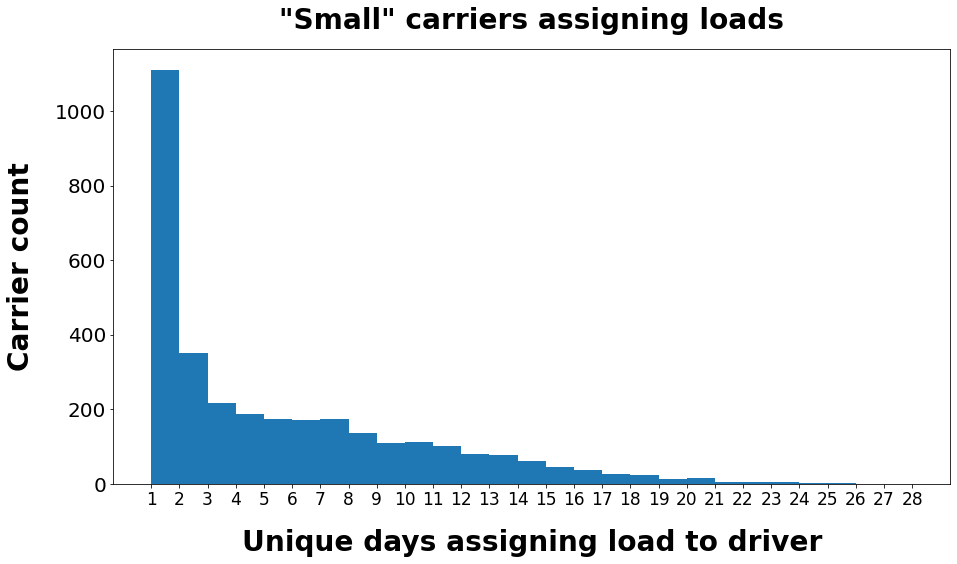

In [13]:
# histogram of unique days of carriers assigning loads to drivers
plt.figure(figsize=(15,8))
plt.hist(result['unique_days_assigning_load'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days assigning load to driver', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('"Small" carriers assigning loads', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Now let's segment paid and free users

In [14]:
# creating a table for braintree subscriptions
sql = '''
DROP TABLE IF EXISTS #carrier_with_latest_sub_date
;
SELECT 
carrier_id
,max(created_at) AS last_sub
INTO #carrier_with_latest_sub_date
FROM ctms_db_public.billing_braintreesubscription
WHERE braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
GROUP BY carrier_id
;
SELECT 
#carrier_with_latest_sub_date.carrier_id
,last_sub
,braintree_subscription_status
FROM #carrier_with_latest_sub_date
JOIN ctms_db_public.billing_braintreesubscription
ON #carrier_with_latest_sub_date.carrier_id = billing_braintreesubscription.carrier_id
AND #carrier_with_latest_sub_date.last_sub = billing_braintreesubscription.created_at
WHERE billing_braintreesubscription.braintree_subscription_status IN ('Active', 'Past Due', 'Pending')
;
'''
braintree_subs = pd.read_sql_query(sql, con=engine)
braintree_subs

,carrier_id,last_sub,braintree_subscription_status
0,5466,2016-11-26 09:21:35.868856,Active
1,3298,2016-11-26 09:21:30.983747,Active
2,4925,2017-01-20 15:19:46.097090,Active
3,1421,2017-05-18 13:42:02.182933,Active
4,433,2017-06-19 19:32:44.584252,Active
...,...,...,...
2866,14072,2021-01-18 19:13:08.675679,Active
2867,4554,2021-01-18 19:44:05.227397,Active
2868,40497,2021-01-18 23:06:56.706775,Active
2869,41621,2021-01-18 23:49:41.427665,Active


In [15]:
# joining carriers with braintree table
braintree_with_carriers = braintree_subs.merge(carriers, left_on='carrier_id', right_on='carrier_id')
braintree_with_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name,carrier_guid
0,5466,2016-11-26 09:21:35.868856,Active,Rob's Auto Transport LLC,101ce8ba-b529-43c1-80bf-c0f6939ba2a3
1,3298,2016-11-26 09:21:30.983747,Active,Rhoades Logistics LLC,7196d66a-cd25-4ae4-bcdb-15f01b895c2e
2,4925,2017-01-20 15:19:46.097090,Active,Double Time Transport,533c4db9-1f0e-4da2-83e1-ed1385508496
3,1421,2017-05-18 13:42:02.182933,Active,"L&N Transport, LLC",4ba23995-f6ad-4efa-86f8-e3d14d4d9e32
4,433,2017-06-19 19:32:44.584252,Active,FRANK MESSINA,525f3fe2-61bf-452b-b5dd-2ff269a05231
...,...,...,...,...,...
2866,14072,2021-01-18 19:13:08.675679,Active,ABA Logistics,9802165b-65e2-4d34-a9e7-1f9d3001a841
2867,4554,2021-01-18 19:44:05.227397,Active,DB TRANSPORT LLC,f3c31466-8ad6-4624-b14c-035e943b1012
2868,40497,2021-01-18 23:06:56.706775,Active,JGRAM TRANSPORTATION LLC,005ac507-176d-4806-888e-c23ea5df80b9
2869,41621,2021-01-18 23:49:41.427665,Active,PH AUTO TRANSPORT LLC,126dea7c-d499-4a51-b014-a013e21c0231


# Paid users

In [16]:
result_paid_users = (result.merge(braintree_with_carriers, left_on=['carrier_guid', 'carrier_id'],
                                           right_on=['carrier_guid', 'carrier_id']))

result_paid_users = result_paid_users[['carrier_id', 'carrier_guid', 'unique_days_assigning_load']]
result_paid_users['paid_user'] = True
result_paid_users

,carrier_id,carrier_guid,unique_days_assigning_load,paid_user
0,41527,8c18182c-23f2-4179-b65f-3cbd3ac27923,5,True
1,23640,9cce6727-adef-40e3-95d7-0b5bfe237ec9,6,True
2,36877,cc0f83c5-0e33-481b-970d-a08d2889c4ef,1,True
3,19645,33429d17-1ae1-4bd5-823e-b5d40101cdc4,4,True
4,35223,5f291ae2-1c49-4ec7-8c32-d378c711bd26,11,True
...,...,...,...,...
733,36152,7dfc91d6-a592-4088-90aa-1f54c4883609,13,True
734,39394,c29c0a0f-b44c-492b-a9dc-bc2c60ce3793,12,True
735,37876,c5e2798b-db9a-4ade-aa25-e7463e31c3ef,6,True
736,1249,f4c464c5-0104-4791-994d-9b5914588b89,2,True


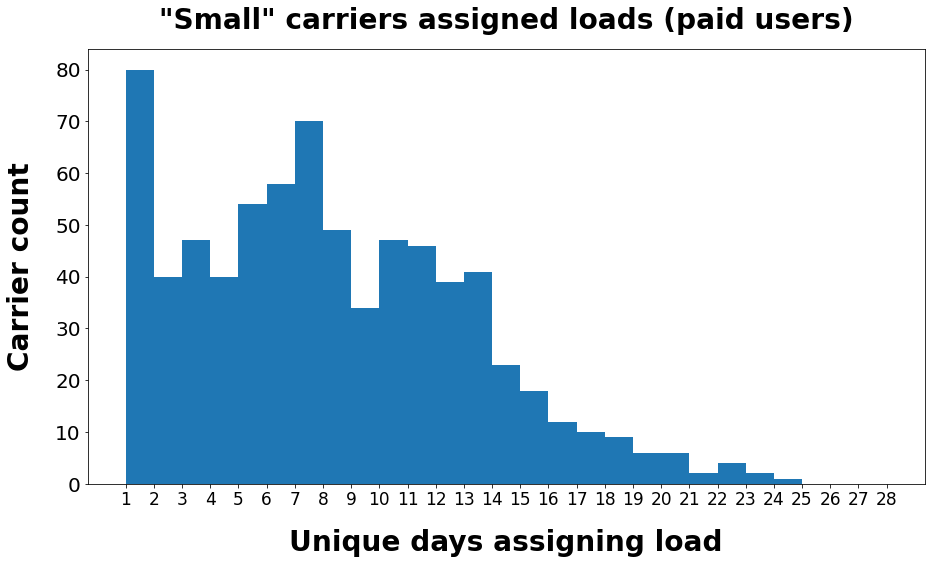

In [17]:
# histogram of unique accepted offers in last 28 days (paid users)
plt.figure(figsize=(15,8))
plt.hist(result_paid_users['unique_days_assigning_load'], bins=np.arange(1, 29))
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days assigning load', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('"Small" carriers assigned loads (paid users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

# Free users

In [18]:
result_free_users = (result.merge(braintree_with_carriers, how='left', left_on=['carrier_guid', 'carrier_id'],
                                           right_on=['carrier_guid', 'carrier_id']))

# Free users will have a missing value under braintree_subscription_status
non_payers = result_free_users['braintree_subscription_status'].isna() == True
# dropping all paid user rows
result_free_users = result_free_users[non_payers]
result_free_users = result_free_users[['carrier_id', 'carrier_guid', 'unique_days_assigning_load']]
result_free_users['paid_user'] = False
result_free_users

,carrier_id,carrier_guid,unique_days_assigning_load,paid_user
0,31325,e7099505-fd84-4b33-b516-619c3dba082b,1,False
2,39555,b5edf761-bfa6-439f-b229-99ef50b11ebe,2,False
3,44420,8d60f6a4-8b26-4af8-a13f-3afa3a19d089,1,False
4,19760,5d9fee9e-e351-4a05-a588-16c2d26362d9,1,False
5,44250,26c9c7b2-ff83-4b08-be1b-bce685596c99,1,False
...,...,...,...,...
3232,18807,cc48056a-1dc0-4b3d-bae2-205ed4e49d58,14,False
3233,18333,81cc99a5-083b-4346-a369-71ef0efa5e2f,2,False
3234,25231,7a6fced4-ef39-46fc-80b5-de93992a775f,4,False
3235,43638,b06c7afb-9f6c-4a54-a9f8-de22f6ab5333,1,False


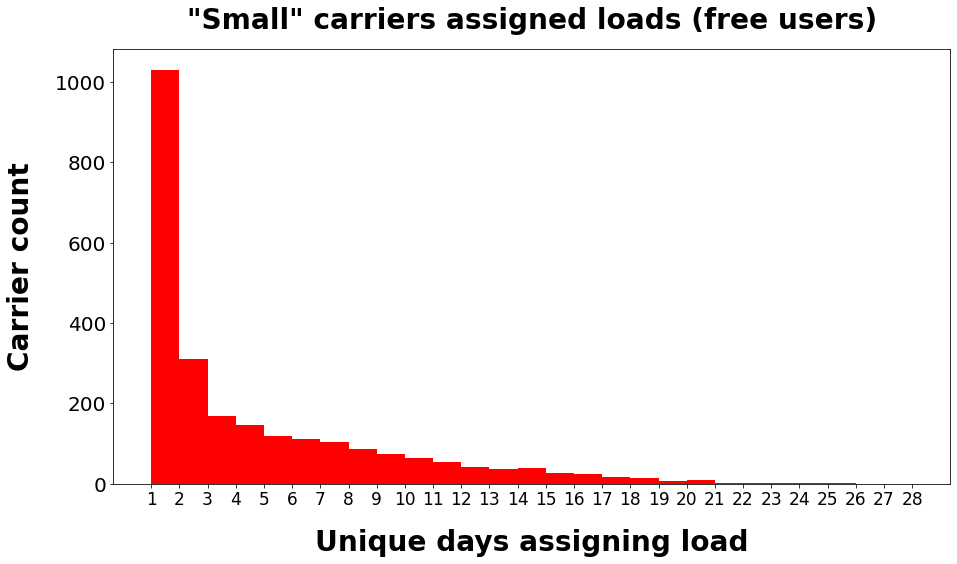

In [19]:
# histogram of unique accepted offers in last 28 days (paid users)
plt.figure(figsize=(15,8))
plt.hist(result_free_users['unique_days_assigning_load'], bins=np.arange(1, 29), color='red')
plt.xticks(np.arange(1, 29), fontsize=17)
plt.yticks(fontsize=20)
plt.xlabel('Unique days assigning load', fontsize=28, fontweight='bold', labelpad=20)
plt.ylabel('Carrier count', fontsize=28, fontweight='bold', labelpad=20)
plt.title('"Small" carriers assigned loads (free users)', fontsize=28, fontweight='bold', pad=20)
plt.show()

In [20]:
total_paid_carriers_for_days_active = []

for i in range(1,29):
    paid_active_carrier_count = (result_paid_users[result_paid_users['unique_days_assigning_load'] >= i]
                           .groupby('unique_days_assigning_load').count()['carrier_guid'].sum())
    
    total_paid_carriers_for_days_active.append(paid_active_carrier_count)
    


total_free_carriers_for_days_active = []

for i in range(1,29):
    free_active_carrier_count = (result_free_users[result_free_users['unique_days_assigning_load'] >= i]
                           .groupby('unique_days_assigning_load').count()['carrier_guid'].sum())
    
    total_free_carriers_for_days_active.append(free_active_carrier_count)

In [21]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                       /len(result_paid_users))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                       /len(result_free_users))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [22]:
def paid_vs_non_paid(paid_metric_definition, non_paid_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           (paid_active_carriers.loc[1, 'total_carriers_at_least_this_active'] - 
                            paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'])],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/paid_active_carriers.loc[1, 'total_carriers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
assigned load
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[non_paid_metric_definition, 'total_carriers_at_least_this_active'],
                           (free_active_carriers.loc[1, 'total_carriers_at_least_this_active'] - 
                            free_active_carriers.loc[non_paid_metric_definition, 'total_carriers_at_least_this_active'])],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/free_active_carriers.loc[1, 'total_carriers_at_least_this_active'])), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
assigned load
(free users)'''.format(non_paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

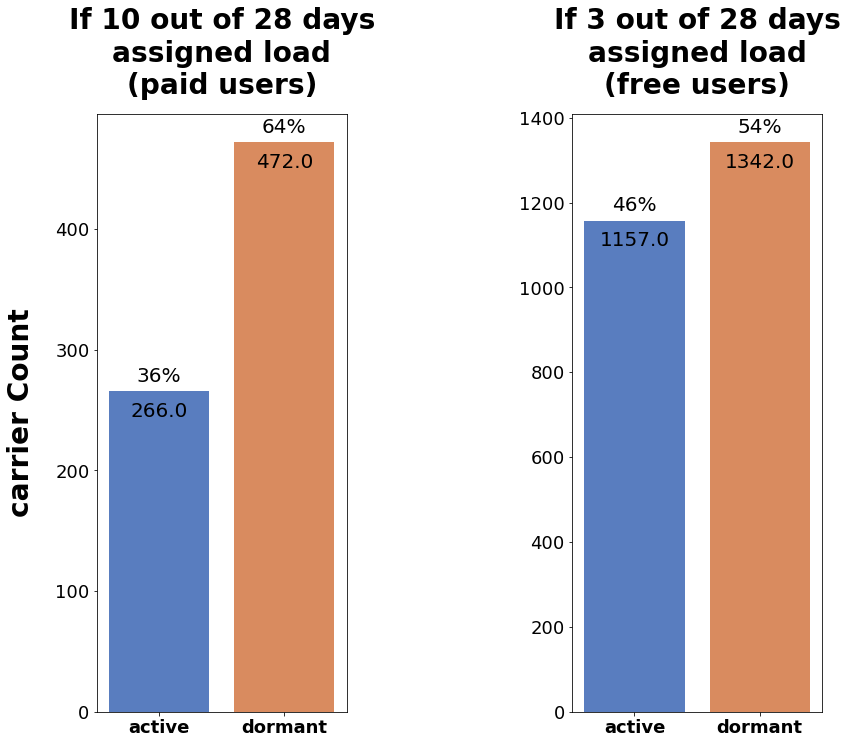

In [23]:
paid_vs_non_paid(10, 3)

In [24]:
all_paid_small_carriers = braintree_with_carriers
all_paid_small_carriers = all_paid_small_carriers.merge(active_driver_count,
                                                    left_on=['carrier_guid', 'carrier_id'],
                                                    right_on=['carrier_guid', 'carrier_id'])
# getting only small carriers
all_paid_small_carriers = all_paid_small_carriers[all_paid_small_carriers['activated_drivers'] == 1]
all_paid_small_carriers

,carrier_id,last_sub,braintree_subscription_status,carrier_name_x,carrier_guid,carrier_name_y,activated_drivers
1,3298,2016-11-26 09:21:30.983747,Active,Rhoades Logistics LLC,7196d66a-cd25-4ae4-bcdb-15f01b895c2e,Rhoades Logistics LLC,1
3,1421,2017-05-18 13:42:02.182933,Active,"L&N Transport, LLC",4ba23995-f6ad-4efa-86f8-e3d14d4d9e32,"L&N Transport, LLC",1
6,3308,2017-02-13 02:21:54.843458,Active,Advent Group,38d943bc-8e5b-4838-bf8e-72b9408a2f2b,Advent Group,1
17,6084,2017-11-16 15:56:28.636548,Active,Leaving A Legacy Transportation,be3c0c94-bb5b-445c-9a92-7164627973b7,Leaving A Legacy Transportation,1
18,16065,2018-03-21 16:18:10.583405,Active,Dunn Good Transport,f6ef276f-9735-4725-940e-7895436b7407,Dunn Good Transport,1
...,...,...,...,...,...,...,...
2792,35814,2020-03-06 05:24:31.818122,Past Due,TEAM MCQUEEN ENTERPRISE LLC,c5cc39df-1731-4d15-99a9-00fe63a5a443,TEAM MCQUEEN ENTERPRISE LLC,1
2793,29519,2020-07-31 18:44:54.690128,Past Due,AMD LOGISTICS INC,76cc797f-ac69-4787-89be-cc6e34b057db,AMD LOGISTICS INC,1
2794,21945,2020-08-11 16:08:14.414794,Past Due,ADAM'S TRUCKING TRANSPORTATION LLC,943c83c5-412e-439b-9b7c-1d7e66669b87,ADAM'S TRUCKING TRANSPORTATION LLC,1
2796,40070,2020-10-23 19:23:10.023854,Past Due,GF CAR TRANSPORT LLC,cb34c0de-c1da-4920-8cdb-3f37614430dd,GF CAR TRANSPORT LLC,1


In [25]:
all_free_small_carriers =  carriers.merge(braintree_with_carriers, how='left',
                                        left_on='carrier_guid', right_on='carrier_guid')

# getting all free users
non_payers = all_free_small_carriers['braintree_subscription_status'].isna() == True
# #dropping all rows with paid users
all_free_small_carriers = all_free_small_carriers[non_payers]
# getting only small carriers 
all_free_small_carriers = all_free_small_carriers.merge(active_driver_count,
                                                    left_on='carrier_guid',
                                                    right_on='carrier_guid')
all_free_small_carriers = all_free_small_carriers[all_free_small_carriers['activated_drivers'] == 1]
all_free_small_carriers

,carrier_name_x,carrier_guid,carrier_id_x,carrier_id_y,last_sub,braintree_subscription_status,carrier_name_y,carrier_id,carrier_name,activated_drivers
0,J&T Wrecker Service LLC,9e446db7-d3dd-443e-a16e-b9edf7685e05,33,NaN,NaT,NaN,NaN,33,J&T Wrecker Service LLC,1
1,Prime Track Inc,45c2d62f-50f8-464b-9d8b-289c22af3a8e,167,NaN,NaT,NaN,NaN,167,Prime Track Inc,1
2,Real Deal Auto Clinic Inc.,4dfb1eea-8eed-4156-9924-9776a2b0b6f0,171,NaN,NaT,NaN,NaN,171,Real Deal Auto Clinic Inc.,1
3,AS trucking llc,f2584277-d577-430f-932a-003254a6fdcc,211,NaN,NaT,NaN,NaN,211,AS trucking llc,1
4,FM Auto trans,ef862060-9260-4204-863c-259bdc74a8f4,229,NaN,NaT,NaN,NaN,229,FM Auto trans,1
...,...,...,...,...,...,...,...,...,...,...
35941,DERSTINE AUTO TRANSPORT LLC,fc175144-dcc9-4d8a-b24a-bed4deb6d352,41397,NaN,NaT,NaN,NaN,41397,DERSTINE AUTO TRANSPORT LLC,1
35944,Mukesh Auto,411a3768-95fa-4efc-94f4-5a4279c8c7d7,41795,NaN,NaT,NaN,NaN,41795,Mukesh Auto,1
35946,ILIA TRANSPORTATION LLC,7cfda26f-d2ae-479d-bd83-06566b15c38a,44514,NaN,NaT,NaN,NaN,44514,ILIA TRANSPORTATION LLC,1
35949,CARMEN & BUTCH TRUCKING COMPANY LLC,3277653c-25fc-4420-bf9b-9f71d7078026,44517,NaN,NaT,NaN,NaN,44517,CARMEN & BUTCH TRUCKING COMPANY LLC,1


In [26]:
paid_active_carriers = pd.DataFrame()
paid_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
paid_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
paid_active_carriers['total_carriers_at_least_this_active'] = total_paid_carriers_for_days_active
paid_active_carriers['total_dormant_carriers'] = ([len(all_paid_small_carriers) - total_paid_carriers_for_days_active[x]
                                                 for x in range(len(total_paid_carriers_for_days_active))]) 
paid_active_carriers['total_percentage_active'] = round(100*paid_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_paid_small_carriers))
paid_active_carriers['total_percentage_dormant'] = 100 - paid_active_carriers['total_percentage_active']


free_active_carriers = pd.DataFrame()
free_active_carriers['definition_is_this_many_days_active'] = np.arange(1,29)
free_active_carriers.set_index('definition_is_this_many_days_active', inplace=True)
free_active_carriers['total_carriers_at_least_this_active'] = total_free_carriers_for_days_active
free_active_carriers['total_dormant_carriers'] = ([len(all_free_small_carriers) - total_free_carriers_for_days_active[x]
                                                 for x in range(len(total_free_carriers_for_days_active))])
free_active_carriers['total_percentage_active'] = round(100*free_active_carriers['total_carriers_at_least_this_active']
                                                      /len(all_free_small_carriers))
free_active_carriers['total_percentage_dormant'] = 100 - free_active_carriers['total_percentage_active']

In [27]:
def all_users(paid_metric_definition, free_metric_definition):
    plt.figure(figsize=(13,11))
    plt.subplots_adjust(wspace=.9)
    
    plt.subplot(1,2,1)
    paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[paid_active_carriers.loc[paid_metric_definition, 'total_carriers_at_least_this_active'],
                           paid_active_carriers.loc[paid_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in paid_graph.patches:
        paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_paid_small_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    plt.ylabel('Carrier Count', fontsize=28, fontweight='bold', labelpad=20)
    title = '''If {} out of 28 days
assigning load
(paid users)'''.format(paid_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)

        
    
    plt.subplot(1,2,2)
    non_paid_graph = sns.barplot(x=['active', 'dormant'],
                        y=[free_active_carriers.loc[free_metric_definition, 'total_carriers_at_least_this_active'], 
                           free_active_carriers.loc[free_metric_definition, 'total_dormant_carriers']],
                        palette='muted')
    for p in non_paid_graph.patches:
        non_paid_graph.annotate(p.get_height(), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -20), 
                       textcoords = 'offset points',
                       fontsize=20)
        non_paid_graph.annotate('{}%'.format(round(100*p.get_height()/len(all_free_small_carriers))), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 15), 
                       textcoords = 'offset points',
                       fontsize=20)
    plt.xticks(fontsize=18, fontweight='bold')
    plt.yticks(fontsize=18)
    title = '''If {} out of 28 days
assigning load
(free users)'''.format(free_metric_definition)
    plt.title(title, fontsize=28, fontweight='bold', pad=20)
    plt.show()

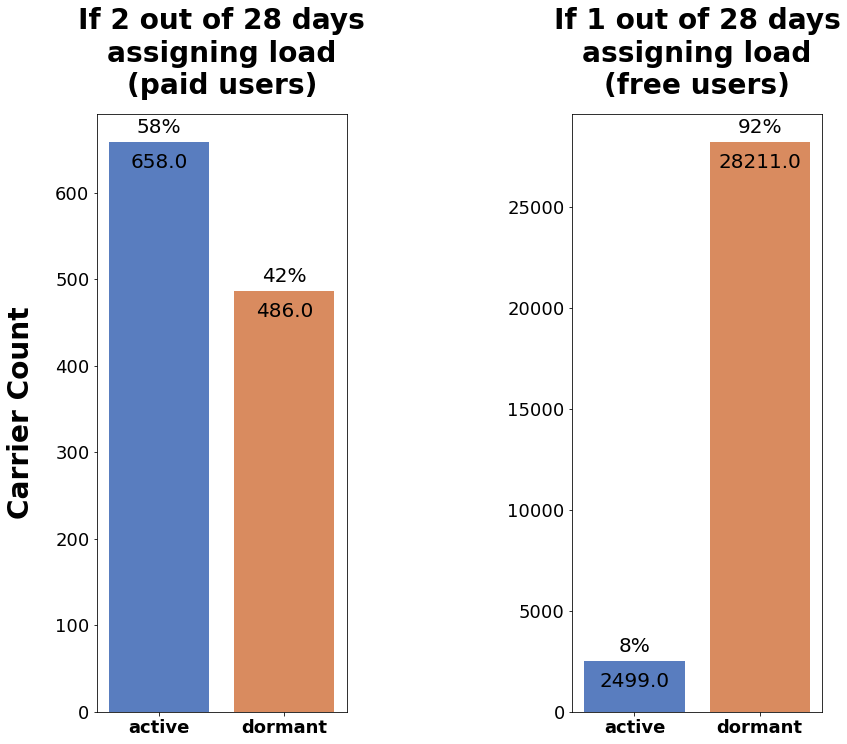

In [28]:
all_users(2,1)